<a href="https://colab.research.google.com/github/sime1/notebooks/blob/master/CIFAR_10_CNN_preprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN e CIFAR-10

In questo notebook utilizzo una Convolutional Neural Network sul dataset `CIFAR-10`. Rispetto al [notebook precedente](https://colab.research.google.com/github/sime1/notebooks/blob/master/CIFAR_10_CNN.ipynb), ho utilizzato anche `ImageDataGenerator` per aumentare il dataset.

`ImageDataGenerator` prende le immagini presenti nel dataset e applica alcune trasformazioni per generare nuove immagini che possono essere utilizzate durante il training. In questo caso, le trasformazioni utilizzate sono traslazione verticale, traslazione orizzontale e flip ("specchio") orizzontale. Utilizzando queste immagini è possibile aumentare la dimensione del dataset, e migliorare la generalità del modello.

In [0]:
%tensorflow_version 2.x

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

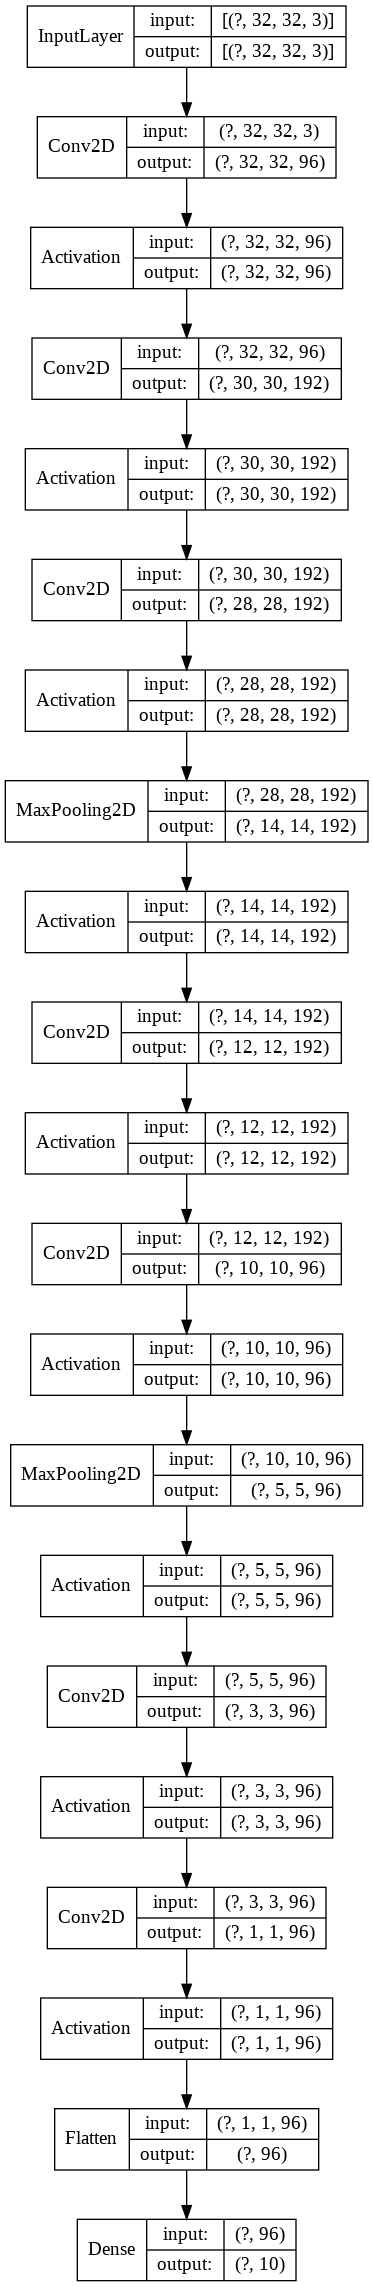

In [0]:
model = Sequential()
model.add(Conv2D(96, 3, input_shape=(32, 32, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, 3))
model.add(Activation('relu'))
model.add(Conv2D(192, 3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Activation('relu'))
model.add(Conv2D(192, 3))
model.add(Activation('relu'))
model.add(Conv2D(96, 3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Activation('relu'))
model.add(Conv2D(96, 3))
model.add(Activation('relu'))
model.add(Conv2D(96, 3))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
plot_model(model, show_layer_names=False, show_shapes=True)

In [0]:
model.fit_generator(gen.flow(x_train, y_train, seed=1, batch_size=32), steps_per_epoch=len(x_train)/32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1563/1562 [==============================] - 83s 53ms/step - loss: 1.6577 - accuracy: 0.3861 - val_loss: 1.3461 - val_accuracy: 0.5191
Epoch 2/100
1563/1562 [==============================] - 82s 52ms/step - loss: 1.2625 - accuracy: 0.5450 - val_loss: 1.1774 - val_accuracy: 0.5903
Epoch 3/100
1563/1562 [==============================] - 82s 53ms/step - loss: 1.0665 - accuracy: 0.6209 - val_loss: 1.0612 - val_accuracy: 0.6381
Epoch 4/100
1563/1562 [==============================] - 82s 53ms/step - loss: 0.9352 - accuracy: 0.6688 - val_loss: 0.8785 - val_accuracy: 0.6896
Epoch 5/100
1563/1562 [==============================] - 83s 53ms/step - loss: 0.8544 - accuracy: 0.6989 - val_loss: 0.8399 - val_accuracy: 0.7055
Epoch 6/100
1563/1562 [==============================] - 83s 53ms/step - loss: 0.8056 - accuracy: 0.7167 - val_loss: 0.8620 - val_accuracy: 0.7161
Epoch 7/100
1563/1562 [==============================] - 83s 53ms/step - loss: 0.7655 - accuracy: 0.7314 - val_loss: 0

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save('/content/gdrive/My Drive/cnn-cifar10-augmented.h5')